In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [2]:
sales_data = pd.read_csv(r'C:\Users\USER\Downloads\Walmart_Sales.csv.csv')

In [3]:
sales_data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,02-05-2010,1643690.90,0,42,2.57,211.096,8.106
1,1,02-12-2010,1641957.44,1,39,2.55,211.242,8.106
2,1,02-19-2010,1611968.17,0,40,2.51,211.289,8.106
3,1,02-26-2010,1409727.59,0,47,2.56,211.320,8.106
4,1,03-05-2010,1554806.68,0,47,2.63,211.350,8.106
...,...,...,...,...,...,...,...,...
6430,45,09-28-2012,713173.95,0,65,4.00,192.014,8.684
6431,45,10-05-2012,733455.07,0,65,3.99,192.170,8.667
6432,45,10-12-2012,734464.36,0,54,4.00,192.327,8.667
6433,45,10-19-2012,718125.53,0,56,3.97,192.331,8.667


In [4]:
sales_data.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,02-05-2010,1643690.90,0,42,2.57,211.096,8.106
1,1,02-12-2010,1641957.44,1,39,2.55,211.242,8.106
2,1,02-19-2010,1611968.17,0,40,2.51,211.289,8.106
3,1,02-26-2010,1409727.59,0,47,2.56,211.320,8.106
4,1,03-05-2010,1554806.68,0,47,2.63,211.350,8.106
5,1,03-12-2010,1439541.59,0,58,2.67,211.381,8.106
6,1,03-19-2010,1472515.79,0,55,2.72,211.216,8.106
7,1,03-26-2010,1404429.92,0,51,2.73,211.018,8.106
8,1,04-02-2010,1594968.28,0,62,2.72,210.820,7.808
9,1,04-09-2010,1545418.53,0,66,2.77,210.623,7.808


In [5]:
sales_data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.677078,3.359122,171.578398,7.999151
std,12.988182,5.643666e+05,0.255049,18.443290,0.458903,39.356706,1.875885
min,1.000000,2.099862e+05,0.000000,-2.000000,2.470000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.000000,2.930000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,63.000000,3.450000,182.617000,7.874000
75%,34.000000,1.420159e+06,0.000000,75.000000,3.740000,212.743500,8.622000
max,45.000000,3.818686e+06,1.000000,100.000000,4.470000,227.233000,14.313000


In [6]:
sales_data.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [8]:
sales_data.duplicated().sum()

0

In [9]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   int64  
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 402.3+ KB


In [10]:
sales_data[['Weekly_Sales','Temperature','Fuel_Price', 'CPI', 'Unemployment']].describe()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
count,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000
mean,1.046965e+06,60.677078,3.359122,171.578398,7.999151
std,5.643666e+05,18.443290,0.458903,39.356706,1.875885
min,2.099862e+05,-2.000000,2.470000,126.064000,3.879000
25%,5.533501e+05,47.000000,2.930000,131.735000,6.891000
50%,9.607460e+05,63.000000,3.450000,182.617000,7.874000
75%,1.420159e+06,75.000000,3.740000,212.743500,8.622000
max,3.818686e+06,100.000000,4.470000,227.233000,14.313000


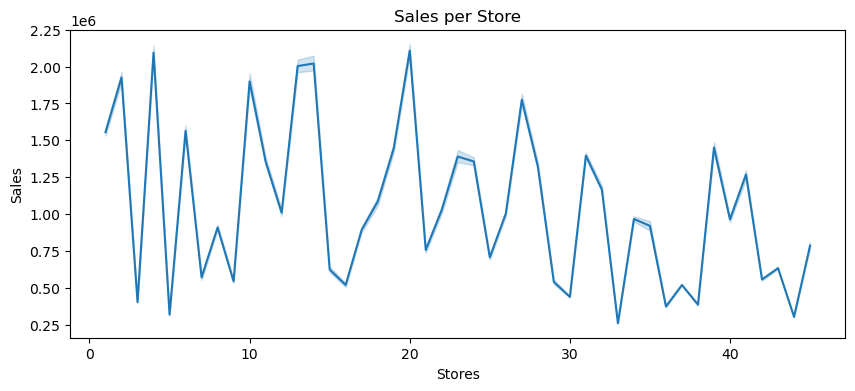

In [11]:
plt.figure(figsize=(10,4))
sns.lineplot(data = sales_data, x = 'Store', y = 'Weekly_Sales')
plt.xlabel('Stores')
plt.ylabel('Sales')
plt.title('Sales per Store')
plt.show()

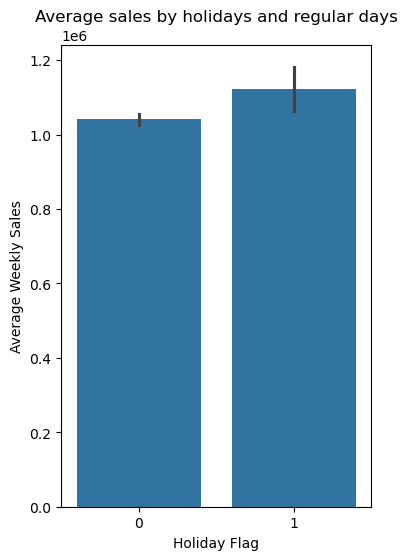

In [12]:
plt.figure(figsize = (4, 6))
sns.barplot(data = sales_data,
           x = 'Holiday_Flag',
           y = 'Weekly_Sales',
           estimator = np.mean)

plt.title('Average sales by holidays and regular days')
plt.xlabel('Holiday Flag')
plt.ylabel('Average Weekly Sales')
plt.show()

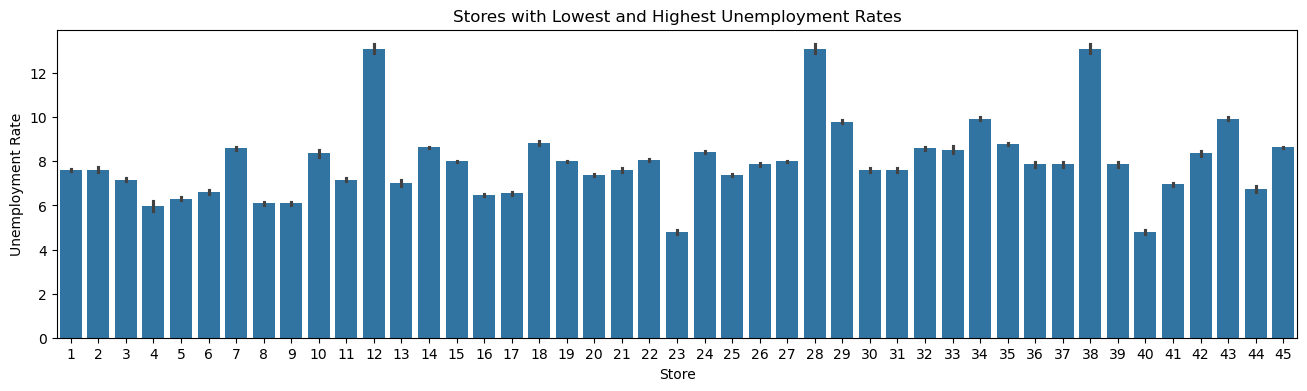

In [13]:
plt.figure(figsize=(16, 4))
sns.barplot(data = sales_data,
            x='Store',
            y='Unemployment')

plt.title('Stores with Lowest and Highest Unemployment Rates')
plt.xlabel('Store')
plt.ylabel('Unemployment Rate')
plt.show()

In [14]:
needed_columns = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
correlation_matrix = sales_data[needed_columns].corr()
correlation_matrix

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
Weekly_Sales,1.000000,-0.063769,0.009483,-0.072634,-0.106176
Temperature,-0.063769,1.000000,0.144777,0.177041,0.100768
Fuel_Price,0.009483,0.144777,1.000000,-0.170514,-0.034889
CPI,-0.072634,0.177041,-0.170514,1.000000,-0.302020
Unemployment,-0.106176,0.100768,-0.034889,-0.302020,1.000000


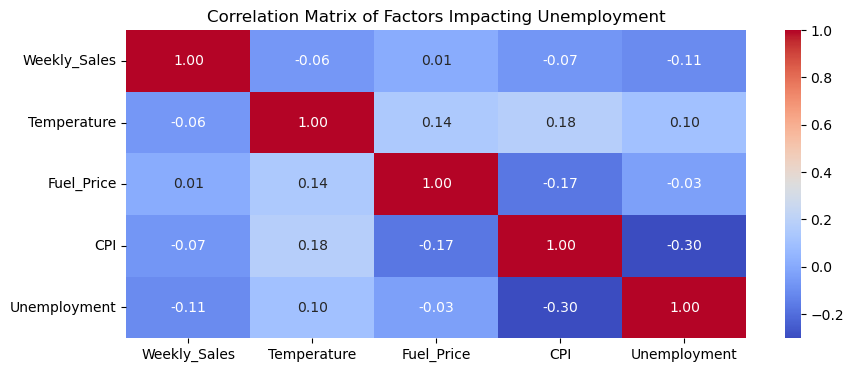

In [15]:
plt.figure(figsize=(10, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Factors Impacting Unemployment')
plt.show()

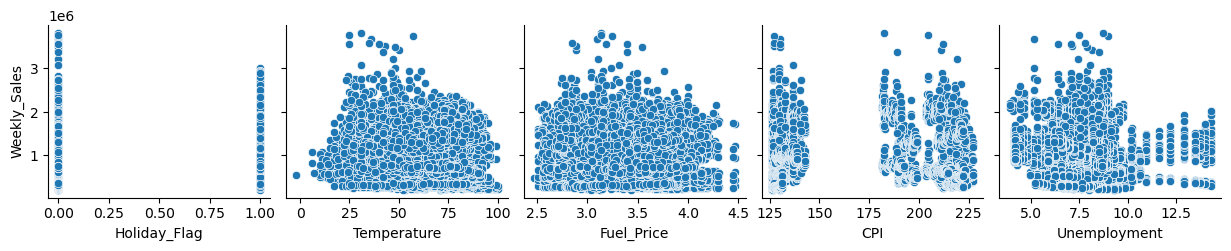

In [16]:
sns.pairplot(sales_data, x_vars=['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment'], 
             y_vars=['Weekly_Sales'], kind='scatter')

In [17]:
corr_all = sales_data[['CPI', 'Weekly_Sales']].corr()
print("Correlation matrix for all data:")
print(corr_all)

Correlation matrix for all data:
                   CPI  Weekly_Sales
CPI           1.000000     -0.072634
Weekly_Sales -0.072634      1.000000


Correlation matrix for non-holidays:
                   CPI  Weekly_Sales
CPI           1.000000     -0.071939
Weekly_Sales -0.071939      1.000000


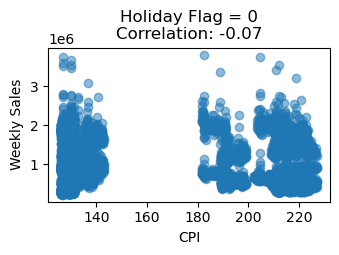

In [18]:
non_holiday_data = sales_data[sales_data['Holiday_Flag'] == 0]
corr_non_holiday = non_holiday_data[['CPI', 'Weekly_Sales']].corr()
corr_value = corr_non_holiday.loc['CPI', 'Weekly_Sales']
print("Correlation matrix for non-holidays:")
print(corr_non_holiday)
plt.figure(figsize=(8, 2))
plt.subplot(1, 2, 1)
plt.scatter(non_holiday_data['CPI'], non_holiday_data['Weekly_Sales'], alpha=0.5)
plt.title(f"Holiday Flag = 0\nCorrelation: {corr_value:.2f}")
plt.xlabel('CPI')
plt.ylabel('Weekly Sales')
plt.show()

Correlation matrix for holidays:
                  CPI  Weekly_Sales
CPI           1.00000      -0.08097
Weekly_Sales -0.08097       1.00000


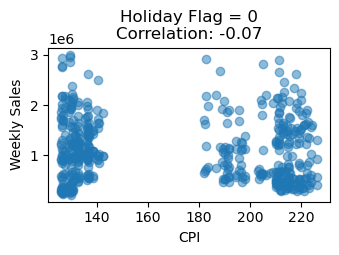

In [19]:
holiday_data = sales_data[sales_data['Holiday_Flag'] == 1]
corr_holiday = holiday_data[['CPI', 'Weekly_Sales']].corr()
print("Correlation matrix for holidays:")
print(corr_holiday)
plt.figure(figsize=(8, 2))
plt.subplot(1, 2, 1)
plt.scatter(holiday_data['CPI'], holiday_data['Weekly_Sales'], alpha=0.5)
plt.title(f"Holiday Flag = 0\nCorrelation: {corr_value:.2f}")
plt.xlabel('CPI')
plt.ylabel('Weekly Sales')
plt.show()

In [20]:
print(sales_data.columns)

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')


In [21]:
sales_data = sales_data.drop(columns=['Date'])

In [22]:
print(sales_data.columns)

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment'],
      dtype='object')


In [23]:
fuel_price_corr = sales_data.corr()['Fuel_Price'].sort_values()
print("Correlation of Fuel Price with other fields:")
print(fuel_price_corr)

Correlation of Fuel Price with other fields:
CPI            -0.170514
Holiday_Flag   -0.078089
Unemployment   -0.034889
Weekly_Sales    0.009483
Store           0.059957
Temperature     0.144777
Fuel_Price      1.000000
Name: Fuel_Price, dtype: float64
